In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
data =  pd.read_csv('Bank Customer Churn Prediction.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Business Objective:
1. identify the best ML model to predict customer churn 
2. Understand key variables that contribute to customer churn

In [3]:
data.shape

(10000, 12)

array([[<AxesSubplot:title={'center':'credit_score'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'balance'}>],
       [<AxesSubplot:title={'center':'estimated_salary'}>,
        <AxesSubplot:>]], dtype=object)

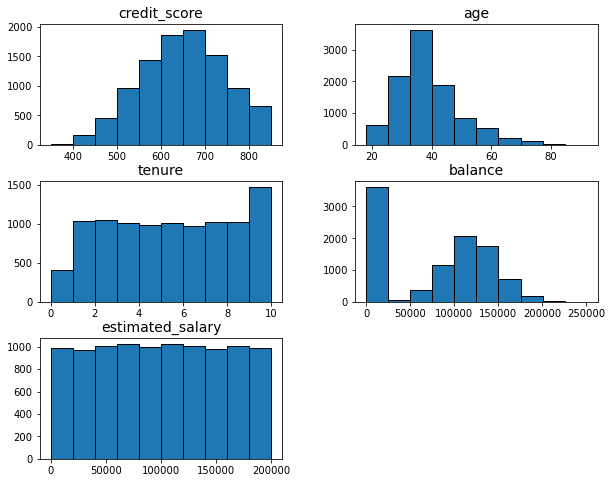

In [4]:
# EDA
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
data[['credit_score','age','tenure','balance','estimated_salary']].hist(grid = False, edgecolor = 'black', figsize=(10, 8))


<AxesSubplot:title={'center':'churn'}>

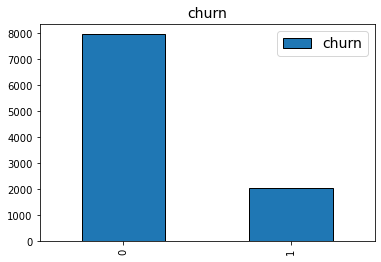

In [5]:
data.churn.value_counts().plot(kind = 'bar',legend = True, edgecolor = 'black', title = 'churn')


In [6]:
round(data.churn.value_counts(normalize=True),2)

0    0.8
1    0.2
Name: churn, dtype: float64

<AxesSubplot:>

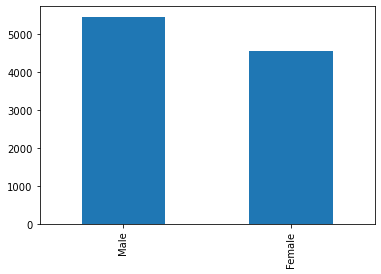

In [7]:
data.gender.value_counts().plot(kind = 'bar')

<AxesSubplot:>

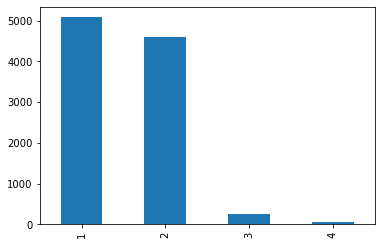

In [8]:
data.products_number.value_counts().plot(kind = 'bar')

<AxesSubplot:>

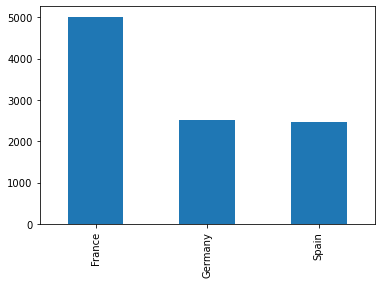

In [9]:
data.country.value_counts().plot(kind = 'bar')

<AxesSubplot:>

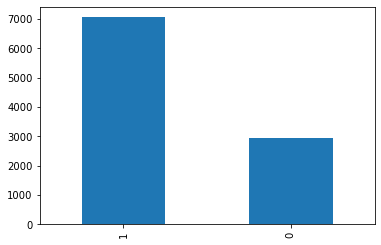

In [10]:
data.credit_card.value_counts().plot(kind = 'bar')

<AxesSubplot:>

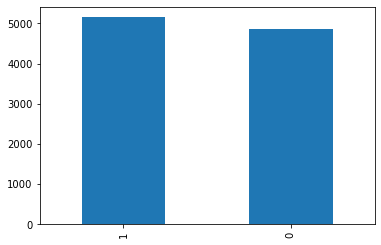

In [11]:
data.active_member.value_counts().plot(kind = 'bar')

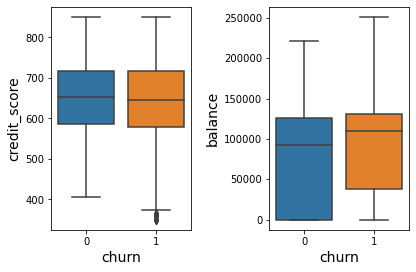

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.boxplot(x = 'churn', y = 'credit_score', data=data, orient='v', ax = ax1)
sns.boxplot(x= 'churn', y = 'balance', data=data, orient='v',ax = ax2)
plt.tight_layout()

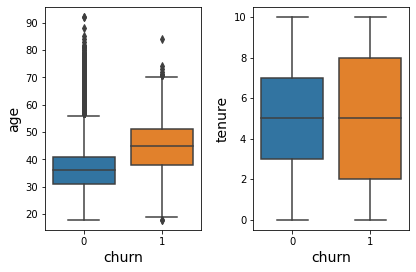

In [13]:
fig, (ax3, ax4) = plt.subplots(1, 2)
sns.boxplot(x= 'churn', y = 'age', data=data, orient='v',ax = ax3)
sns.boxplot(x= 'churn', y = 'tenure', data=data, orient='v',ax = ax4)
plt.tight_layout()

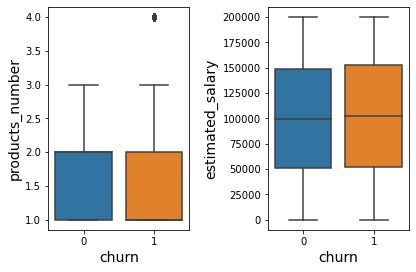

In [14]:
fig, (ax5, ax6) = plt.subplots(1, 2)
sns.boxplot(x= 'churn', y = 'products_number', data=data, orient='v',ax = ax5)
sns.boxplot(x= 'churn', y = 'estimated_salary', data=data, orient='v',ax = ax6)
plt.tight_layout()

Classfication problem

Accuracy Metric: recall and precision



In [15]:
# Check data type
data.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [16]:
# data cleaning
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})

In [17]:
country_dummy = pd.get_dummies(data.country,prefix="country")
country_dummy.head(5)

,country_France,country_Germany,country_Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [18]:
data = pd.concat([data,country_dummy],axis=1)
data = data.drop(columns = "country", axis=1)  
data = data.drop(columns = 'country_Germany', axis = 1) # use germany as the baseline
data = data.drop(columns = "customer_id", axis=1)
data.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


In [19]:
data.dtypes

credit_score          int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
country_France        uint8
country_Spain         uint8
dtype: object

In [20]:
# feature selection 
x_numeric = data[['credit_score','age','tenure','balance','products_number','estimated_salary']]
x_categorical = data[['gender','credit_card','active_member']]
x_dummy = data[['country_France','country_Spain']]
y = data[['churn']]

In [21]:
# imputation of missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(x_numeric)
imputer.statistics_


array([6.52000000e+02, 3.70000000e+01, 5.00000000e+00, 9.71985400e+04,
       1.00000000e+00, 1.00193915e+05])

In [22]:
X = imputer.transform(x_numeric)

In [23]:
imputer.feature_names_in_

array(['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'estimated_salary'], dtype=object)

In [24]:
x_numeric_imputed = pd.DataFrame(X, columns=x_numeric.columns,
                          index=x_numeric.index)
x_numeric_imputed.head()

,credit_score,age,tenure,balance,products_number,estimated_salary
0,619.0,42.0,2.0,0.00,1.0,101348.88
1,608.0,41.0,1.0,83807.86,1.0,112542.58
2,502.0,42.0,8.0,159660.80,3.0,113931.57
3,699.0,39.0,1.0,0.00,2.0,93826.63
4,850.0,43.0,2.0,125510.82,1.0,79084.10


In [25]:
# scaling 
from sklearn.preprocessing import StandardScaler
x_numeric_imputed_std = StandardScaler().fit_transform(x_numeric_imputed)
x_numeric_imputed_std = pd.DataFrame(x_numeric_imputed_std, columns = x_numeric.columns, index=x_numeric.index)
x_numeric_imputed_std.head()

,credit_score,age,tenure,balance,products_number,estimated_salary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276


In [26]:
imputer2 = SimpleImputer(strategy="most_frequent")
imputer2.fit(x_categorical)
imputer2.statistics_

array([0., 1., 1.])

In [27]:
X2 = imputer2.transform(x_categorical)

In [28]:
imputer2.feature_names_in_

array(['gender', 'credit_card', 'active_member'], dtype=object)

In [29]:
x_categorical_imputed = pd.DataFrame(X2, columns=x_categorical.columns,
                          index=x_categorical.index)
x_categorical_imputed.head()

,gender,credit_card,active_member
0,1,1,1
1,1,0,1
2,1,1,0
3,1,0,0
4,1,1,1


In [30]:
# final feature
x_final = x_numeric_imputed_std.add(x_categorical_imputed, fill_value=0).add(x_dummy, fill_value = 0)
x_final.head()

,active_member,age,balance,country_France,country_Spain,credit_card,credit_score,estimated_salary,gender,products_number,tenure
0,1.0,0.293517,-1.225848,1.0,0.0,1.0,-0.326221,0.021886,1.0,-0.911583,-1.041760
1,1.0,0.198164,0.117350,0.0,1.0,0.0,-0.440036,0.216534,1.0,-0.911583,-1.387538
2,0.0,0.293517,1.333053,1.0,0.0,1.0,-1.536794,0.240687,1.0,2.527057,1.032908
3,0.0,0.007457,-1.225848,1.0,0.0,0.0,0.501521,-0.108918,1.0,0.807737,-1.387538
4,1.0,0.388871,0.785728,0.0,1.0,1.0,2.063884,-0.365276,1.0,-0.911583,-1.041760


In [31]:
# cross validation
from sklearn.model_selection import KFold
cvdata = KFold(n_splits=5, random_state=0,shuffle=True)

In [32]:
# logistic regression
from sklearn.linear_model import LogisticRegression    
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay, precision_score
from sklearn import metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(x_final, y, test_size = 0.2, random_state=0,stratify = y)

lr = LogisticRegression(penalty='none')
lr.fit(X_train,y_train)
lr_predicted = lr.predict(X_test)


C:\Users\tud20\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
cm = confusion_matrix(y_test, lr_predicted)

In [34]:
cm

array([[1529,   64],
       [ 319,   88]], dtype=int64)

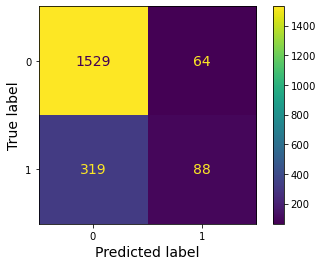

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

C:\Users\tud20\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


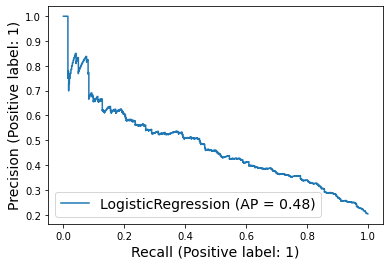

In [36]:
metrics.plot_precision_recall_curve(lr,X_test,y_test)

In [37]:
print('the best precision I can get from logistic regression about 0.35, when recall is 80%')

the best precision I can get from logistic regression about 0.35, when recall is 80%


In [38]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

C:\Users\tud20\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [39]:
cm_knn = confusion_matrix(y_test, knn_predicted)

In [40]:
cm_knn

array([[1585,    8],
       [ 334,   73]], dtype=int64)

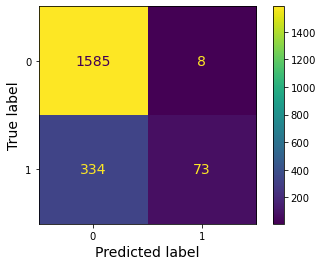

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp.plot()

C:\Users\tud20\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


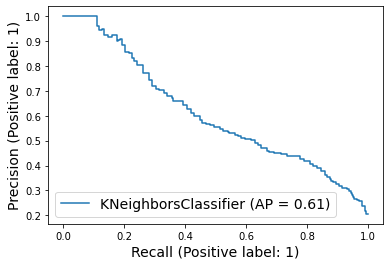

In [42]:
metrics.plot_precision_recall_curve(knn,X_test,y_test)

In [43]:
print('the best precision I can get from KNN is about 0.45, when recall is 80%')

the best precision I can get from KNN is about 0.45, when recall is 80%


In [54]:
# single Tree
from sklearn import tree
model1 = tree.DecisionTreeClassifier(random_state=0)
model1 = model1.fit(X_train, y_train)

In [55]:
model1_predicted = model1.predict(X_test)

In [56]:
cm_tree = confusion_matrix(y_test, model1_predicted)
cm_tree

array([[1379,  214],
       [ 205,  202]], dtype=int64)

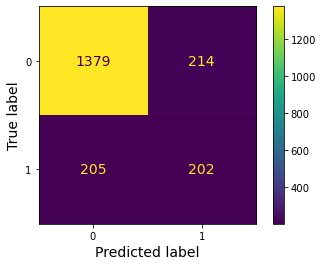

In [57]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot()

C:\Users\tud20\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


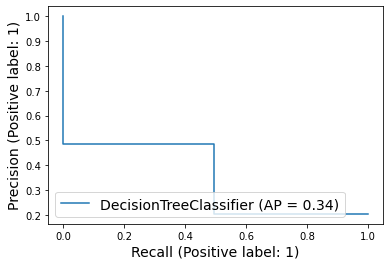

In [58]:
metrics.plot_precision_recall_curve(model1,X_test,y_test)

In [59]:
print('the best precision I can get from a single tree is about 0.22, when recall is 80%')

the best precision I can get from a single tree is about 0.22, when recall is 80%


In [60]:
# bagged trees
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=1000, max_features=None)
model2 = model2.fit(X_train, y_train)

C:\Users\tud20\AppData\Local\Temp\ipykernel_11716\3587332366.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2 = model2.fit(X_train, y_train)


In [61]:
model2_predicted = model2.predict(X_test)

In [62]:
cm_baggedtree = confusion_matrix(y_test, model2_predicted)
cm_baggedtree

array([[1521,   72],
       [ 218,  189]], dtype=int64)

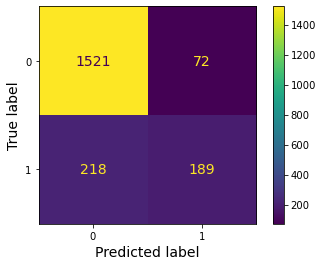

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baggedtree)
disp.plot()

C:\Users\tud20\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


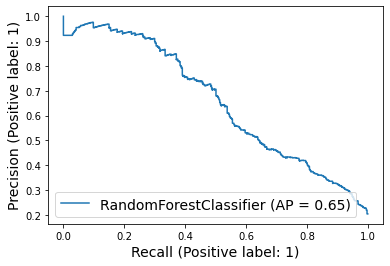

In [64]:
metrics.plot_precision_recall_curve(model2,X_test,y_test)

In [65]:
print('the best precision I can get from a bagged tree is about 0.43, when recall is 80%')

the best precision I can get from a bagged tree is about 0.43, when recall is 80%


In [66]:
# Random forests
model3 = RandomForestClassifier(n_estimators=1000, max_features='sqrt')
model3 = model3.fit(X_train, y_train)

C:\Users\tud20\AppData\Local\Temp\ipykernel_11716\2951742622.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3 = model3.fit(X_train, y_train)


In [67]:
model3_predicted = model3.predict(X_test)

In [68]:
cm_randomforest = confusion_matrix(y_test, model3_predicted)
cm_randomforest

array([[1536,   57],
       [ 221,  186]], dtype=int64)

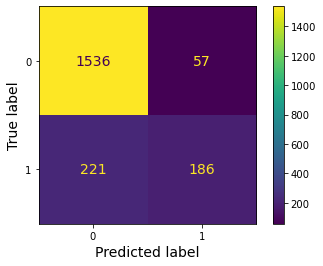

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_randomforest)
disp.plot()

C:\Users\tud20\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


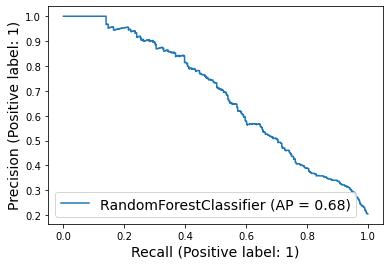

In [70]:
metrics.plot_precision_recall_curve(model3,X_test,y_test)

In [71]:
print('the best precision I can get from random forest is about 0.40, when recall is 80%')

the best precision I can get from random forest is about 0.40, when recall is 80%


# Metrics Table
Classifier           | Recall | Precision | Area under the PR curve |
---------------------|----------------|--------------|--------------|
Logistic Regression        |    0.80            |    0.35    |0.48 |
KNN        |    0.80            |    0.45    |0.61 |
Single Tree       |    0.80            |    0.22    |0.34 |
Bagged Tree        |    0.80            |    0.43    |0.66 |
Random Forest        |    0.80            |    0.40    |0.68 |

In [72]:
# Use random Forest to understand key variables that contribute to churn  

In [73]:
importances = model3.feature_importances_

In [74]:
feature_names = list(X_train.columns.values)
forest_importances = pd.Series(importances, index=feature_names)

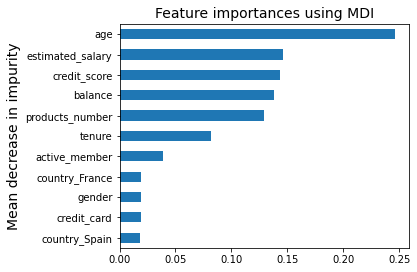

In [75]:
fig, ax = plt.subplots()
forest_importances.sort_values().plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Summary:
1. KNN and Random forest are the best ML model to predict customer churn 
2. Age, estimated salary, credit score, balance and products number are important variables that contribute to customer churn.
